In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories= pd.read_csv('calories.csv')
excercise= pd.read_csv('exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories_data= pd.concat([excercise, calories['Calories']], axis=1)

In [6]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
calories_data.shape

(15000, 9)

In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


C:\Users\infinity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

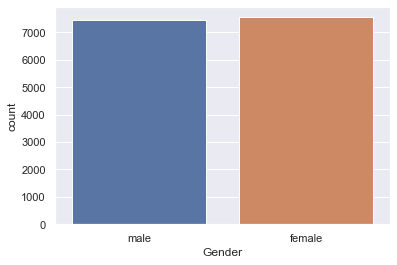

In [11]:
# Data visualization
sns.set()
# Plotting the Gender column
sns.countplot(calories_data['Gender'])

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

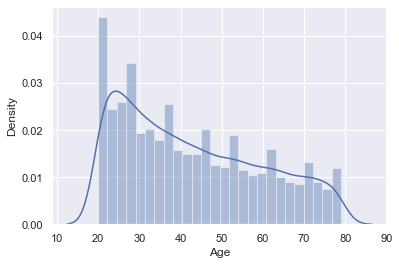

In [12]:
#Plotting the ditribution of 'Age' column
sns.distplot(calories_data['Age'])

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

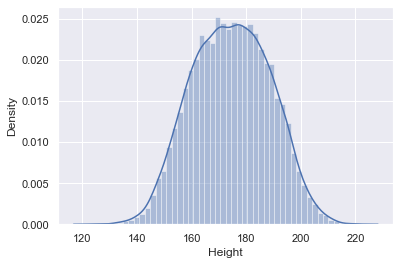

In [13]:
sns.distplot(calories_data['Height'])

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

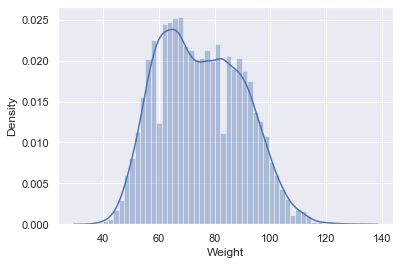

In [14]:
 sns.distplot(calories_data['Weight'])

<AxesSubplot:>

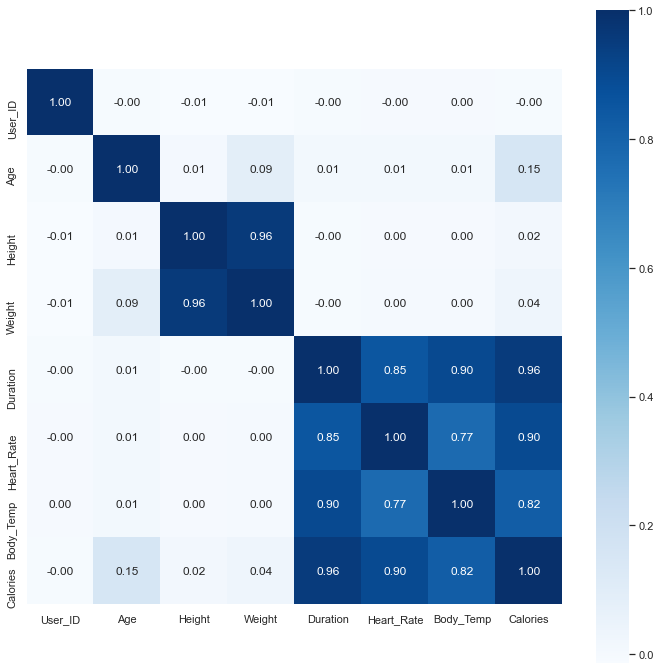

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(calories_data.corr(), cmap='Blues', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12} )

In [16]:
#Encoding the categorical values
calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)

In [17]:
#Seperating Features and Target column 
x=calories_data.drop(columns=['User_ID', 'Gender'], axis=1)
y=calories_data['Calories']

In [18]:
#Splitting Training anad Testing Data

Xtrain, Xtest, Ytrain, Ytest= train_test_split(x, y,test_size=0.2, random_state=2 )

In [19]:
# Model training

model=XGBRegressor()
model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [20]:
ytrain_pred= model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

In [25]:
ytrain_pred

array([ 12.003177,  37.00459 ,  31.000202, ..., 108.06295 , 180.0243  ,
        43.9673  ], dtype=float32)

In [21]:
TrainingData_r2_score= metrics.r2_score(Ytrain, ytrain_pred)
TestData_r2_score= metrics.r2_score(Ytest, ytest_pred)

print('The r2 Error score on Training data is:',TrainingData_r2_score )
print('The r2 Error score on Test data is:',TestData_r2_score )

The r2 Error score on Training data is: 0.9999996399957648
The r2 Error score on Test data is: 0.9999802240268413


In [22]:
TrainingData_MAE= metrics.mean_absolute_error(Ytrain, ytrain_pred)
TestData_MAE= metrics.mean_absolute_error(Ytest, ytest_pred)
print('The Mean Absolute Error  on Training data is:',TrainingData_MAE )
print('The Mean Absolute Error  on Test data is:',TestData_MAE )

The Mean Absolute Error  on Training data is: 0.02602081028620402
The Mean Absolute Error  on Test data is: 0.03493161392211914


### Making a Predictive Model

In [27]:
input= (0,69,179.0,79.0,5.0,88.0,38.7)
input=np.asarray(input)
input= input.reshape(1,-1)

prediction= model.predict(input)
print(prediction)

[39.032288]
